# 集成学习进阶-XGBoost极限梯度提升算法

## 模块安装

-  cpu版本安装
pip install xgboost

-  GPU版本的安装
conda install -c conda-forge py-xgboost-gpu

In [1]:
import xgboost as xgb
print(xgb.__version__)

2.1.3


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. 读取数据: xgb.DMatrix() # 读取数据
2. 设置参数: param = {}  # 设置参数
3. 训练模型: xgb.train(params)
4. 预测结果:  xgb.predict()

### xgboost的sklean api

In [34]:
from xgboost import XGBRegressor # 
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split

data = pd.read_csv('./data/train_encode.csv',index_col=0)

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, random_state=1210)

In [36]:
xgb_sg = XGBRegressor(random_state=1210)
xgb_sg.fit(X_train,y_train)
xgb_sg.score(X_test,y_test) # 默认返回到指标生R^2

0.8986894232222045

In [37]:
import time
from rich import print
def RMSE(result, name):
    return abs(result[name].mean())

cv = KFold(n_splits=5, shuffle=True, random_state=1210)
start_time = time.time()

result_xgb_sg = cross_validate(xgb_sg,X,y,cv=cv,
        scoring='neg_root_mean_squared_error',
        return_train_score=True,
        verbose=True,
        n_jobs=-1)
elapsed_time = time.time() - start_time
print(f"模型的名称: XGBoost, \
训练耗时: {result_xgb_sg['fit_time'].mean()}, \
训练集分数: {RMSE(result_xgb_sg, 'train_score')}, \
测试集分数:{RMSE(result_xgb_sg,'test_score')}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


模型的名称: XGBoost, 训练耗时: 0.6478349685668945, 训练集分数: 835.7244886670805, 测试集分数:30086.623416939274

In [84]:
xgb_sg = XGBRegressor(max_depth=4,
                      random_state=1210,
                      n_estimators=100,
                      learning_rate=0.1,
                      min_child_weight=.6,
                      booster='gbtree',
                      gamma=100,
                      reg_alpha=4,
                      subsample=.9,
                      nehred=14,
                      rate_drop=0.5,
                      num_boost_round=150,
                     )

import time
from rich import print
def RMSE(result, name):
    return abs(result[name].mean())

cv = KFold(n_splits=5, shuffle=True, random_state=1210)
start_time = time.time()

result_xgb_sg = cross_validate(xgb_sg,X,y,cv=cv,
        scoring='neg_root_mean_squared_error',
        return_train_score=True,
        verbose=True,
        n_jobs=-1)
elapsed_time = time.time() - start_time
print(f"模型的名称: XGBoost, \
训练耗时: {result_xgb_sg['fit_time'].mean()}, \
训练集分数: {RMSE(result_xgb_sg, 'train_score')}, \
测试集分数:{RMSE(result_xgb_sg,'test_score')}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


模型的名称: XGBoost, 训练耗时: 0.18949356079101562, 训练集分数: 10528.43273650927, 测试集分数:27603.554281010165

### xgboost算法属性

In [92]:
xgb_sg = XGBRegressor(max_depth=5,random_state=1210).fit(X, y)
xgb_sg.feature_importances_ # 查看重要的特征
xgb_sg.get_booster()[1]
xgb_sg.get_num_boosting_rounds() # 查看建立的树的数量
xgb_sg.predict(X) # 做预测
xgb_sg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 1210,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## XGBoost回归原生代码实现

1. 数据集对我们来说是新的,必须使用DMatrix,这也是第一步要完成的
2. 设置参数
3. 训练模型,传入的设置的参数
4. 预测结果

### 将数据转换为DMatrix

In [94]:
data_xgb = xgb.DMatrix(X,y)

In [112]:
data_xgb.get_label() # 可以获取标签
data_xgb.feature_names # 可以拿到特征名
data_xgb.feature_types # 查看字段的类型
data_xgb.get_data() # 看到一些基础信息
type(data_xgb)
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=1210, test_size=0.3)

data_train = xgb.DMatrix(X_train, y_train)
data_test = xgb.DMatrix(X_test,y_test)

### 设置参数

In [147]:
params = {
    'max_depth': 4,
    'random_state': 1210,
}

In [148]:
# 模型训练
reg = xgb.train(params, data_xgb,num_boost_round= 150,)
# 模型预测
y_pred = reg.predict(data_xgb)
# 模型评分
from sklearn.metrics import root_mean_squared_error as RMSE
RMSE(y,y_pred=y_pred)

4307.2708181234675

### 使用交叉验证进行训练

In [144]:
params = {
    'max_depth': 5,
    'random_state': 1210
}
result = xgb.cv(params,data_xgb, num_boost_round=150, nfold=10,seed=1210)
result.mean()

train-rmse-mean     6492.066736
train-rmse-std       236.742734
test-rmse-mean     28467.623064
test-rmse-std       8148.199177
dtype: float64

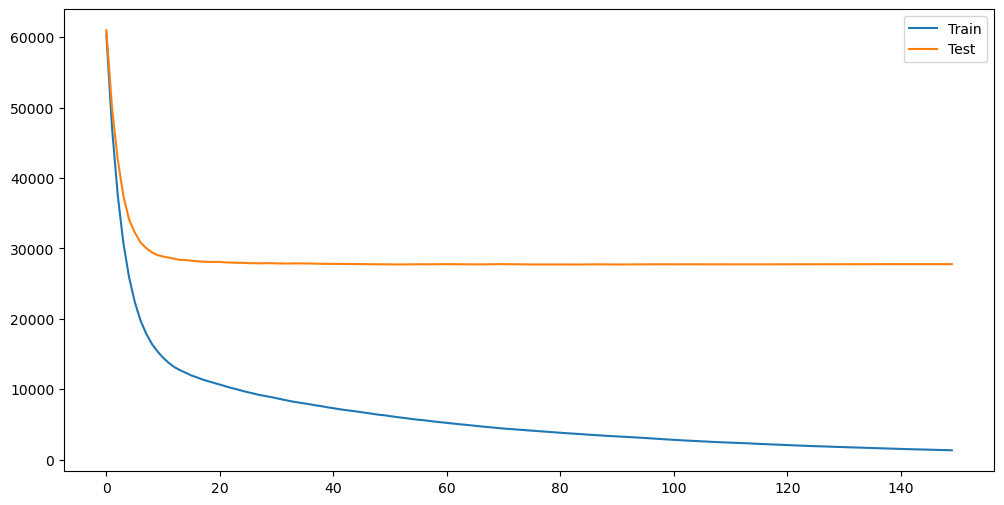

In [146]:
plt.figure(figsize=(12,6), dpi=100)
plt.plot(result['train-rmse-mean'],label='Train')
plt.plot(result['test-rmse-mean'], label='Test')
plt.legend()
plt.show()

### 使用GPU加速???

In [11]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split
import time
from rich import print

import pandas as pd 
data = pd.read_csv('./data/train_encode.csv',index_col=0)

va = []
for i in range(1000):
    va.append(data)
datas = pd.concat(va,axis=0)


In [12]:
X = datas.iloc[:,:-1]
y = datas.iloc[:,-1]
data_xgb = xgb.DMatrix(X,y)

In [13]:
def run_cv(use_gpu):
    params = {
    'max_depth': 4,
    'random_state': 1210,
    'device': "cuda" if use_gpu else 'cpu'
    }
    start_time = time.time()
    result = xgb.cv(
        params=params,
        dtrain=data_xgb,
        num_boost_round=100,
        nfold=5,
        seed=1210,
        as_pandas=False,
        verbose_eval=False,
    )
    elapsed_time = time.time() - start_time
    return elapsed_time, result

In [14]:
cpu_elapsed_time, result = run_cv(use_gpu=False)
print(f"未使用GPU加速,平均耗时为: {cpu_elapsed_time:.4f}秒")

未使用GPU加速,平均耗时为: 39.2214秒

In [15]:
gpu_elapsed_time, result = run_cv(use_gpu=True)
print(f"使用GPU加速,平均耗时为: {gpu_elapsed_time:.4f}秒")

使用GPU加速,平均耗时为: 15.6101秒

In [19]:
# sklean API版本,没有使用GPU加速
import time
from rich import print
def RMSE(result, name):
    return abs(result[name].mean())
X = datas.iloc[:,:-1]
y = datas.iloc[:,-1]
xgb_sg = XGBRegressor(random_state=1210, max_depth=5)
cv = KFold(n_splits=5, shuffle=True, random_state=1210)
start_time = time.time()

result_xgb_sg = cross_validate(xgb_sg,X,y,cv=cv,
        scoring='neg_root_mean_squared_error',
        return_train_score=True,
        verbose=True,
        n_jobs=-1)
elapsed_time = time.time() - start_time
print(f"模型的名称: XGBoost, \
训练耗时: {result_xgb_sg['fit_time'].mean()}, \
训练集分数: {RMSE(result_xgb_sg, 'train_score')}, \
测试集分数:{RMSE(result_xgb_sg,'test_score')}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.0s remaining:   46.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.5s finished


模型的名称: XGBoost, 训练耗时: 26.42931318283081, 训练集分数: 2704.2958526684174, 测试集分数:2707.8189250279675

In [20]:
# sklean API版本,没有使用GPU加速
import time
from rich import print
def RMSE(result, name):
    return abs(result[name].mean())
X = datas.iloc[:,:-1]
y = datas.iloc[:,-1]
xgb_sg = XGBRegressor(random_state=1210, max_depth=5, device='cuda')
cv = KFold(n_splits=5, shuffle=True, random_state=1210)
start_time = time.time()

result_xgb_sg = cross_validate(xgb_sg,X,y,cv=cv,
        scoring='neg_root_mean_squared_error',
        return_train_score=True,
        verbose=True,
        n_jobs=-1)
elapsed_time = time.time() - start_time
print(f"模型的名称: XGBoost, \
训练耗时: {result_xgb_sg['fit_time'].mean()}, \
训练集分数: {RMSE(result_xgb_sg, 'train_score')}, \
测试集分数:{RMSE(result_xgb_sg,'test_score')}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.7s remaining:   26.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.9s finished


模型的名称: XGBoost, 训练耗时: 12.490436506271362, 训练集分数: 2704.2960121963865, 测试集分数:2707.8191659976387